In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

def integrand(z, b, a, Vo, R):
    #b,a,Vo,R = args
    return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)


def func(b, a, Vo, R):
    return quad(integrand, -np.inf, np.inf, args=(b, a, Vo, R))[0]


/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_4368/721721793.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm = quad(normalization_integrand,0,np.inf)[0]
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_4368/4090793579.py:8: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_4368/4090793579.py:12: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand, -np.inf, np.inf, args=(b, a, Vo, R))[0]


[ 4.64676017e-01 -1.46255336e-05  2.50029177e+01]


/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_4368/4090793579.py:8: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)


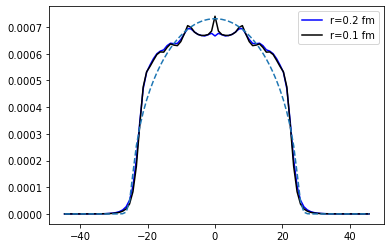

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/Users/pragya/Desktop/Deformation_Heikki/Fluctuatingx1_roots455.404/PbDipAmpRotateNucleus_r01/DipoleAmpAvg.txt',  delimiter=' ' )
df1=pd.read_csv('/Users/pragya/Desktop/Deformation_Heikki/Fluctuatingx1_roots455.404/PbDipAmpRotateNucleus_r02/DipoleAmpAvg.txt',  delimiter=' ' )

from scipy.interpolate import interp1d
interp = interp1d( df[df.columns[0]],df[df.columns[3]], bounds_error=False, fill_value=0)
normalization_integrand= lambda b: 2.0*np.pi*b*interp(b)

norm = quad(normalization_integrand,0,np.inf)[0]
df[df.columns[3]] = df[df.columns[3]]/norm
df1[df1.columns[3]]=df1[df1.columns[3]]/(norm*2.67)

vcurve = np.vectorize(func) #to convert series in float

popt, pcov = curve_fit(vcurve, df[df.columns[0]], df[df.columns[3]], p0=[1,1,1])
print(popt)

plt.plot(df1[df1.columns[0]], df1[df1.columns[3]], color='b', label='r=0.2 fm' )
plt.plot(df[df.columns[0]], df[df.columns[3]], color='k', label='r=0.1 fm')
plt.plot(df[df.columns[0]], vcurve(df[df.columns[0]], *popt), linestyle="dashed")

plt.legend()


In [ ]:
print(popt/5.068)

In [ ]:
plt.plot(df[df.columns[0]]/5.068, df[df.columns[3]] )
plt.plot(df[df.columns[0]]/5.068, vcurve(df[df.columns[0]], *popt), linestyle="dashed")
plt.yscale('log')

## (Rev) FOR THE DEFORMED NUCLEUS 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

FMGEV=5.068

def integrand(z, b, Vo, R):
    a=0.55 * FMGEV
    return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)

"""FIT AS A FUNCTION OF R(THETA) AND THEN DO A LINEAR FIT FOR THE DEFORAMTION PARAMETER"""
"""Remove the fitting on skin depth"""
def func(b, Vo, R):
    return quad(integrand, -np.inf, np.inf, args=(b, Vo, R))[0]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

list_Rtheta = []

for theta in ["M_PI_2", "M_PI_3"]: # "M_PI_4", "M_PI_6", "zero"
    orgdf=pd.read_csv(f'Fluctuatingx0_U_roots70/DummyU_beta2is0.8/Y0theta{theta}/DipoleAmpAvg.txt',  delimiter=' ' )
    
    """Perform binning over the Averaged data"""
    """Dont take q<30"""
    bins = pd.qcut(orgdf[orgdf.columns[0]],q=30)
    
    """Perform mean over N and averageN value"""
    df = pd.DataFrame(orgdf.groupby(bins).agg("mean",{1,2}))
    
    from scipy.interpolate import interp1d
    interp = interp1d( df[df.columns[0]],df[df.columns[2]], bounds_error=False, fill_value=0)
    normalization_integrand= lambda b: 2.0*np.pi*b*interp(b)

    norm = quad(normalization_integrand,0,np.inf)[0]
    df[df.columns[2]] = df[df.columns[2]]/norm

    vcurve = np.vectorize(func)

    popt, pcov = curve_fit(vcurve, df[df.columns[0]], df[df.columns[2]], p0=[1*FMGEV, 1])
    list_Rtheta.append((theta, *popt))

    plt.plot(df[df.columns[0]], df[df.columns[2]], label=f'{theta}')
    plt.plot(df[df.columns[0]], vcurve(df[df.columns[0]], *popt), linestyle="dashed")

    plt.legend()


In [ ]:
print(list_Rtheta)

In [ ]:
import scipy as sci
import scipy.special as sp

def sp_hrm(l, m, theta):
    """angle in radian"""
    return sp.sph_harm(m, l, 0, theta) 


def Rtheta(theta, R, b2): #, b3, b4):
#     R=6.81*FMGEV
#     b3=0
    b3=0
    b4=0.093
    return R * ( 1 + b2 * np.real(sp_hrm(2, 0, theta)) + b3 * np.real(sp_hrm(3, 0, theta)) + b4 * np.real(sp_hrm(4, 0, theta)))

    
dftheta=pd.read_csv(f'Fluctuatingx0_U_roots70/DummyU_beta2is0.8/Rtheta_data.txt',  delimiter=' ' )

vcurve = np.vectorize(Rtheta)

popt, pcov = curve_fit(vcurve, dftheta[dftheta.columns[0]], dftheta[dftheta.columns[2]], p0=[6* FMGEV, 1])

plt.plot(dftheta[dftheta.columns[0]], dftheta[dftheta.columns[2]], label="data")
plt.plot(dftheta[dftheta.columns[0]], vcurve(dftheta[dftheta.columns[0]], *popt), linestyle="dashed")

plt.legend()
print(*popt)


In [ ]:
print(f'R = {popt[0]/FMGEV}; b2 = {popt[1]}; b3= {popt[2]}; b3= {popt[3]}' )

In [ ]:
"""Just to see if we are not messing up somewhere (Solving equation)"""

MatToSolve = np.array([[1, -0.315391, -0.00089151, 
   0.317355], [1, -0.0729258, -0.32467968, -0.25276 ], [1, 
   0.162803, -0.125488, -0.34084], [1, 0.397182, 0.247923, +0.027273]])

Solution = np.array([32.41085956543402/FMGEV, 37.89410068207581/FMGEV, 
  44.277312835662734/FMGEV, 54.1240382538005/FMGEV])

val = np.linalg.solve(MatToSolve,Solution)

print(f'R = {val[0]}; b2 = {val[1]/val[0]}; b3= {val[2]/val[0]}; b3= {val[3]/val[0]}' )



In [ ]:
(1. + 0.630783 * val[1]/val[0] + 0.746353 * val[2]/val[0] + 0.846284 * val[3]/val[0]) * val[0]

# FOR A REALISTIC U - NUCLEUS with b2 = 0.28 and b3 = 0 and b4 = 0.093

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

FMGEV=5.068

def integrand(z, b, Vo, R):
    a=0.55* FMGEV
    return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)

"""FIT AS A FUNCTION OF R(THETA) AND THEN DO A LINEAR FIT FOR THE DEFORAMTION PARAMETER"""
"""Remove the fitting on skin depth"""
def func(b, Vo, R):
    return quad(integrand, -np.inf, np.inf, args=(b, Vo, R))[0]

In [5]:
# specify Y and r (later put a loop)
Y=2.4
r=0.1
def computemean(dirname, maxconf=25):
    data=[]
    for i in range(1, maxconf+1):
        d = np.loadtxt(dirname + "Run" + str(i) + ".txt")
        
        if np.sum(d[:,3]) < 1e-9:
            print("only zeroes in the file")
        
        data.append(d)
    
    data = np.mean(data, axis=0)
    data = pd.DataFrame(data, columns=["theta","b","N","averageN"])
    return data

# Compute mean over differernt configurations
avg=computemean(f'Fluctuatingx0_U_roots70/Fluctuatingx0_U_roots70/Y{Y}r{r}/')



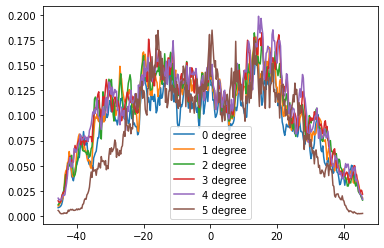

In [6]:
# COMPUTE AVERAGE OVER THE SUPPLEMENTARY ANGLES (THIS IS BASED ON THE SYMMETRY IN THE TRANSVERSE PLANE)
avg['new_theta'] = avg['theta'].apply(lambda x: min(x,180-x))
avg_supplementangle = avg.groupby(['new_theta','b'])['averageN'].mean().reset_index()

"""TO SEE HOW PROFILE LOOKS FOR A GIVEN RANGE IN ANGLE [0-5] (here)"""

plt.plot(avg.b[avg.theta==0],avg.averageN[avg.theta ==0], label = "0 degree")
plt.plot(avg.b[avg.theta==1],avg.averageN[avg.theta ==1], label = "1 degree")
plt.plot(avg.b[avg.theta==2],avg.averageN[avg.theta ==2], label = "2 degree")
plt.plot(avg.b[avg.theta==3],avg.averageN[avg.theta ==3], label = "3 degree")
plt.plot(avg.b[avg.theta==4],avg.averageN[avg.theta ==4], label = "4 degree")
plt.plot(avg.b[avg.theta==45],avg.averageN[avg.theta ==45], label = "5 degree")

# plt.plot(avg_supplementangle.b[avg_supplementangle.new_theta==90], \
#          avg_supplementangle.averageN[avg_supplementangle.new_theta == 90], label = "new 90 degree")
plt.legend()

avg_supplementangle.to_csv(f'Fluctuatingx0_U_roots70/Fluctuatingx0_U_roots70/avg_SuppAngle_Y{Y}r{r}.txt', sep=' ', index=False)


## ADDING A BINNING IN ANGLE TO SEE THE DIFFERENCE 

In [4]:
bins = pd.qcut(avg_supplementangle[avg_supplementangle.columns[0]],45)
angle_bin_df = avg.groupby([bins,'b'])['averageN'].mean().reset_index()

"""New columns are new_theta, b, averageN, theta"""
angle_bin_df['theta']=angle_bin_df['new_theta'].map(lambda x: round(x.mid,1))

angle_bin_df = angle_bin_df.drop(columns={"new_theta"})

# print available angles
print(angle_bin_df.theta.unique())


angle_bin_df

[1.0, 3.0, 5.0, 7.0, 9.0, ..., 81.0, 83.0, 85.0, 87.0, 89.0]
Length: 45
Categories (45, float64): [1.0 < 3.0 < 5.0 < 7.0 ... 83.0 < 85.0 < 87.0 < 89.0]


/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/1580396846.py:10: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(angle_bin_df.theta.unique())


,b,averageN,theta
0,-45.6120,0.009945,1.0
1,-45.3586,0.010653,1.0
2,-45.1052,0.011748,1.0
3,-44.8518,0.013085,1.0
4,-44.5984,0.014696,1.0
...,...,...,...
16240,44.5984,0.000389,89.0
16241,44.8518,0.000312,89.0
16242,45.1052,0.000303,89.0
16243,45.3586,0.000291,89.0


/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/793872014.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm = quad(normalization_integrand,0,np.inf)[0]
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/i

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/793872014.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm = quad(normalization_integrand,0,np.inf)[0]
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/i

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/793872014.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm = quad(normalization_integrand,0,np.inf)[0]
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/i

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/793872014.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm = quad(normalization_integrand,0,np.inf)[0]
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/i

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/793872014.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm = quad(normalization_integrand,0,np.inf)[0]
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/i

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_45207/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)


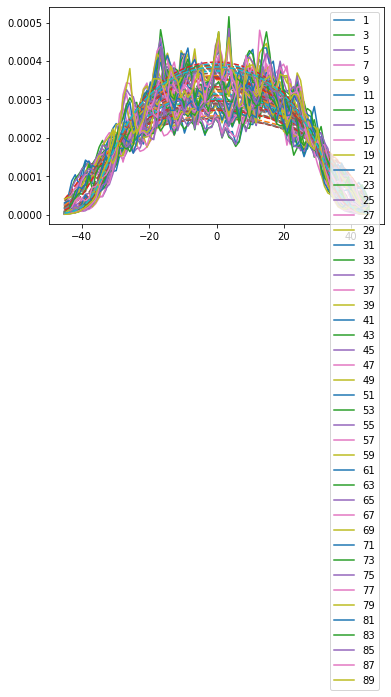

In [5]:
list_Rtheta_BinAngle = []

# GET GROUP OVER ANGLE -- 
avg_angle = angle_bin_df.groupby('theta')

# look at the angle to set the range
for angle in np.arange(1,90,2):
    
    data = avg_angle.get_group(angle)
    """binning in b values"""
    bins = pd.qcut(data['b'],q=90)
    
    # binning over b
    df = pd.DataFrame(data.groupby(bins).agg("mean",{0}))
    
    from scipy.interpolate import interp1d
    interp = interp1d( df['b'],df['averageN'], bounds_error=False, fill_value=0)
    normalization_integrand= lambda b: 2.0*np.pi*b*interp(b)

    norm = quad(normalization_integrand,0,np.inf)[0]
    df['averageN'] = df['averageN']/norm

    vcurve = np.vectorize(func)

    popt, pcov = curve_fit(vcurve, df['b'], df['averageN'], p0=[1*FMGEV, 1])
    list_Rtheta_BinAngle.append((angle*3.14/180, *popt))

    plt.plot(df['b'], df['averageN'], label=f'{angle}')
    plt.plot(df['b'], vcurve(df['b'], *popt), linestyle="dashed")

    plt.legend()



In [6]:
# columns are angle[in radian], averageN, Rtheta[fmGeV]
df_Rtheta_BinAngle = pd.DataFrame(list_Rtheta_BinAngle)

pd.DataFrame(list_Rtheta_BinAngle)

,0,1,2
0,0.017444,-0.000003,44.068256
1,0.052333,-0.000003,44.267218
2,0.087222,-0.000003,43.609836
3,0.122111,-0.000003,42.774420
4,0.157000,-0.000003,41.677695
5,0.191889,-0.000003,41.657606
6,0.226778,-0.000004,40.426481
7,0.261667,-0.000004,40.362264
8,0.296556,-0.000003,40.601549
9,0.331444,-0.000003,40.324993


In [9]:
import scipy as sci
import scipy.special as sp
import scipy.stats

def sp_hrm(l, m, theta):
    """angle in radian"""
    return sp.sph_harm(m, l, 0, theta) 


def Rtheta(theta, R, b2, b3, b4):
    return R * ( 1 + b2 * np.real(sp_hrm(2, 0, theta)) + b3 * np.real(sp_hrm(3, 0, theta)) \
                + b4 * np.real(sp_hrm(4, 0, theta)))


vcurve = np.vectorize(Rtheta)


popt, pcov = curve_fit(vcurve, df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[0]], \
                       df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[2]], p0=[6* FMGEV, 1,1,1])

error_final = np.sqrt(np.diag(pcov))

plt.plot(df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[0]], df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[2]]\
         , label="IP Glasma $U$; " + f'r = {r}' + " and " f'Y={Y}')  

plt.plot(df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[0]], vcurve(df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[0]], *popt),\
         linestyle="dashed", label = "WS fit, $R=" + str(round(popt[0]/FMGEV,3)) + r"\,\mathrm{fm}$, b2 = "+ str(round(popt[1],3)) + ",\n b3 = "+ str(round(popt[2],3)) + ", b4 = "+ str(round(popt[3],3)))

plt.fill_between(df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[0]],vcurve(df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[0]], *(popt - error_final))\
                 , vcurve(df_Rtheta_BinAngle[df_Rtheta_BinAngle.columns[0]], *(popt + error_final)) ,color="grey")

plt.legend()

print(f'R is {popt[0]/FMGEV} fm; b2 is {popt[1]} ; b3 is {popt[2]}; b4 is {popt[3]}'.format({popt[0]/FMGEV},{popt[1]},\
                                                                                         {popt[2]},{popt[3]}))
plt.xlabel(r'$\theta$' + " [radian]", fontsize=14)
plt.ylabel(r'R($\theta$) [fmGeV]', fontsize=14)
plt.tight_layout()
plt.savefig(f'Fluctuatingx0_U_roots70/Fluctuatingx0_U_roots70/PLOTS/Y{Y}r{r}.pdf')
plt.clf()

R is 7.047545155459782 fm; b2 is 0.2076556506760676 ; b3 is 0.0064622131003847505; b4 is 0.07980519743813255


<Figure size 432x288 with 0 Axes>

# WITHOUT BINNING IN ANGLE (PLEASE IGNORE THE REPETITION OF THE CODE -- not using atm)

/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_59145/2167183484.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm = quad(normalization_integrand,0,np.inf)[0]
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_59145/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/ipykernel_59145/587705344.py:11: RuntimeWarning: overflow encountered in exp
  return -Vo/(np.exp((np.sqrt(b**2+z**2) - R)/a) + 1)
/var/folders/vd/7kcv0wsd01qflzy6p6wd496h0000gn/T/

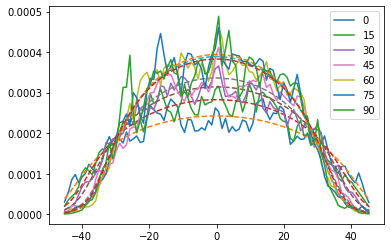

In [7]:
list_Rtheta = []

# GET GROUP OVER ANGLE -- 
avg_angle = avg_supplementangle.groupby('new_theta')

for angle in range(0,91,15):
    
    data = avg_angle.get_group(angle)
    bins = pd.qcut(data[data.columns[1]],q=90)
    
    # binning over b
    df = pd.DataFrame(data.groupby(bins).agg("mean",{1}))
    
    from scipy.interpolate import interp1d
    interp = interp1d( df['b'],df['averageN'], bounds_error=False, fill_value=0)
    normalization_integrand= lambda b: 2.0*np.pi*b*interp(b)

    norm = quad(normalization_integrand,0,np.inf)[0]
    df['averageN'] = df['averageN']/norm

    vcurve = np.vectorize(func)

    popt, pcov = curve_fit(vcurve, df['b'], df['averageN'], p0=[1*FMGEV, 1])
    list_Rtheta.append((angle*3.14/180, *popt))

    plt.plot(df['b'], df['averageN'], label=f'{angle}')
    plt.plot(df['b'], vcurve(df['b'], *popt), linestyle="dashed")

    plt.legend()


In [11]:
pd.DataFrame(list_Rtheta)

,0,1,2
0,0.000000,-0.000003,44.180439
1,0.261667,-0.000003,41.040789
2,0.523333,-0.000004,38.641292
3,0.785000,-0.000005,35.795431
4,1.046667,-0.000006,34.109481
5,1.308333,-0.000006,33.898987
6,1.570000,-0.000006,34.803892


In [12]:
df_Rtheta = pd.DataFrame(list_Rtheta)

R is 7.05543449549649 fm; b2 is 0.17651987736923164 ; b3 is 0.04312138968722249; b4 is 0.08311073426418959


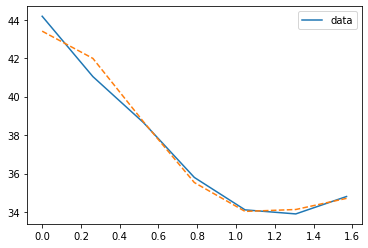

In [13]:
import scipy as sci
import scipy.special as sp

def sp_hrm(l, m, theta):
    """angle in radian"""
    return sp.sph_harm(m, l, 0, theta) 


def Rtheta(theta, R, b2, b3, b4):
#     R=6.81*FMGEV
#     b3=0
#     b3=0
#     b4=0.093
    return R * ( 1 + b2 * np.real(sp_hrm(2, 0, theta)) + b3 * np.real(sp_hrm(3, 0, theta)) \
                + b4 * np.real(sp_hrm(4, 0, theta)))


vcurve = np.vectorize(Rtheta)

popt, pcov = curve_fit(vcurve, df_Rtheta[df_Rtheta.columns[0]], df_Rtheta[df_Rtheta.columns[2]], p0=[6* FMGEV, 1,1,1])

plt.plot(df_Rtheta[df_Rtheta.columns[0]], df_Rtheta[df_Rtheta.columns[2]], label="data")
plt.plot(df_Rtheta[df_Rtheta.columns[0]], vcurve(df_Rtheta[df_Rtheta.columns[0]], *popt), linestyle="dashed")

plt.legend()

print(f'R is {popt[0]/FMGEV} fm; b2 is {popt[1]} ; b3 is {popt[2]}; b4 is {popt[3]}'.format({popt[0]/FMGEV},{popt[1]},\
                                                                                         {popt[2]},{popt[3]}))
